In [16]:
#Importar librerías
import numpy
from collections import defaultdict
from matplotlib import pyplot
import itertools
%matplotlib inline

In [17]:
#Definición de constantes(lenght=longitud del sistema,J=constante de intercambio,kB=Constante de Boltzmann)
length = 10
J = 1.0
kB = 1.0

In [18]:
#Creación de los arreglos(sites=almacenamiento de las parejas i,j, spins=diccionario en el que las keys son las parejas
#y los values son los valores de spin, nbhs=defaultdict(lista donde por defecto los values por defecto son listas vacías)
#cada key es una pareja i,j y cada value es una lista de tuplas, donde cada una corresponde a un vecino)
sites = list()
spins = dict()
nbhs = defaultdict(list)

In [19]:
#Creación de la muestra (red cuadrada de spines)
for x, y in itertools.product(range(length), range(length)):
    sites.append((x,y))

In [20]:
#Visualizar sites
print(sites)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


In [21]:
#Creación del estado aleatorio(lugar donde se comienzan a estudiar los vecinos)
def random_configuration():
    for spin in sites:
        spins[spin] = numpy.random.choice([-1, 1])

In [22]:
#Configurar y visualizar spines
random_configuration()
print(spins)

{(0, 0): -1, (0, 1): 1, (0, 2): 1, (0, 3): -1, (0, 4): 1, (0, 5): -1, (0, 6): 1, (0, 7): -1, (0, 8): 1, (0, 9): 1, (1, 0): -1, (1, 1): 1, (1, 2): -1, (1, 3): -1, (1, 4): -1, (1, 5): -1, (1, 6): -1, (1, 7): 1, (1, 8): 1, (1, 9): -1, (2, 0): 1, (2, 1): 1, (2, 2): 1, (2, 3): 1, (2, 4): -1, (2, 5): 1, (2, 6): 1, (2, 7): -1, (2, 8): 1, (2, 9): -1, (3, 0): 1, (3, 1): -1, (3, 2): 1, (3, 3): 1, (3, 4): 1, (3, 5): 1, (3, 6): -1, (3, 7): 1, (3, 8): 1, (3, 9): -1, (4, 0): 1, (4, 1): 1, (4, 2): -1, (4, 3): 1, (4, 4): -1, (4, 5): 1, (4, 6): -1, (4, 7): -1, (4, 8): -1, (4, 9): -1, (5, 0): -1, (5, 1): -1, (5, 2): -1, (5, 3): -1, (5, 4): 1, (5, 5): -1, (5, 6): -1, (5, 7): 1, (5, 8): -1, (5, 9): 1, (6, 0): -1, (6, 1): -1, (6, 2): -1, (6, 3): -1, (6, 4): 1, (6, 5): 1, (6, 6): -1, (6, 7): -1, (6, 8): -1, (6, 9): 1, (7, 0): -1, (7, 1): 1, (7, 2): -1, (7, 3): -1, (7, 4): -1, (7, 5): 1, (7, 6): 1, (7, 7): 1, (7, 8): 1, (7, 9): -1, (8, 0): -1, (8, 1): 1, (8, 2): -1, (8, 3): -1, (8, 4): -1, (8, 5): 1, (8, 6):

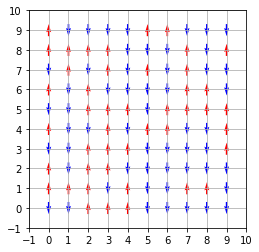

In [23]:
#Función de visualización de spines
def plot_spins():
    pyplot.figure()
    colors = {1: "red", -1: "blue"}
    for site, spin in spins.items():
        x, y = site
        pyplot.quiver(x, y, 0, spin, pivot="middle", color=colors[spin])
    pyplot.xticks(range(-1,length+1))
    pyplot.yticks(range(-1,length+1))
    pyplot.gca().set_aspect("equal")
    pyplot.grid()
    pyplot.show
#Ejecución de la función de visualización de spines
plot_spins()

In [24]:
#Asignación de vecinos
nbhs = defaultdict(list)
for site in spins:
    x, y = site
    if x + 1 < length:
        nbhs[site].append(((x + 1) % length, y))
    if x - 1 >= 0:
        nbhs[site].append(((x - 1) % length, y))
    if y + 1 < length:
        nbhs[site].append((x, (y + 1) % length))
    if y - 1 >= 0:
        nbhs[site].append((x, (y - 1) % length))

magnetization =  0.0


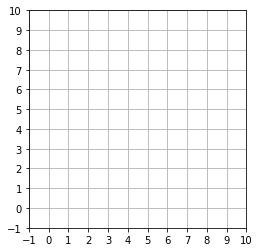

In [10]:
#Función de cálculo de energía local
def energy_site(site):
    energy = 0.0
    for nbh in nbhs[site]:
        energy += spins[site] * spins[nbh]
    return -J * energy

#Función de cálculo de energía total
def total_energy():
    energy = 0.0
    for site in sites:
        energy += energy_site(site)
    return 0.5 * energy

#Cálculo de la magnetización
def magnetization():
    mag = 0.0
    for spin in spins.values():
        mag += spin
    return mag

#Ejecución de las funciones en el estado 0

plot_spins()
print("magnetization = ", magnetization())

In [25]:
#Implementación del algoritmo "metrópolis"
def metropolis(site, T):
    oldSpin = spins[site]
    oldEnergy = energy_site(site)
    spins[site] *= -1
    newEnergy = energy_site(site)
    deltaE = newEnergy - oldEnergy
    if deltaE <= 0:
        pass
    else:
        if numpy.random.uniform(0, 1) <= numpy.exp(-deltaE/(kB*T)):
            pass
        else:
            spins[site] *= -1

In [26]:
#Implementación del algoritmo "montecarlo"
def monte_carlo_step(T):
    for i in range(len(sites)):
        int_rand_site = numpy.random.randint(0, len(sites))
        rand_site = sites[int_rand_site]
        metropolis(rand_site, T)

In [27]:
#Definir los parámetros para la simulación
amount_mcs = 10000
T_high = 5.0
T_low = 0.01
step = -0.1


In [28]:
#Ciclo de temperatura
#%%time
temps = numpy.arange(T_high, T_low, step)
energies = numpy.zeros(shape=(len(temps), amount_mcs))
magnetizations = numpy.zeros(shape=(len(temps), amount_mcs))
random_configuration()
for ind_T, T in enumerate(temps):
    for i in range(amount_mcs):
        monte_carlo_step(T)
        energies[ind_T, i] = total_energy()
        magnetizations[ind_T, i] = magnetization()

KeyboardInterrupt: 

In [ ]:
#Observar el estado final a T=0,01
plot_spins_spinst_spins()

In [ ]:
#Graficos del sistema
#Cálculos de los promedios
tau = amount_mcs // 2
energy_mean = numpy.mean(energies[:, tau:], axis=1)
magnetization_mean = abs(numpy.mean(magnetizations[:, tau:], axis=1))

In [ ]:
#Gráficar la energía total y la magnetización en función de la temperatura
pyplot.figure()
pyplot.plot(temps, energy_mean, label="Energy")
pyplot.legend()
pyplot.xlabel(r"$T$")
pyplot.ylabel(r"$\left<E\right>$")
pyplot.grid()
pyplot.show()

pyplot.figure()
pyplot.plot(temps, magnetization_mean, label="Magnetization")
pyplot.legend()
pyplot.xlabel(r"$T$")
pyplot.ylabel(r"$\left<M\right>$")
pyplot.grid()
pyplot.show()

In [ ]:
#Cálculo de la susceptibilidad magnética
magnetization_std = numpy.std(numpy.abs(magnetizations[:, tau:]), axis=1)
susceptibility = magnetization_std ** 2 / (kB * temps)

pyplot.figure()
pyplot.plot(temps, susceptibility, label="Susceptibility")
pyplot.legend()
pyplot.xlabel(r"$T$")
pyplot.ylabel(r"$\chi$")
pyplot.grid()
pyplot.show()

In [ ]:
#Cállculo del calor específico
energy_std = numpy.std(energies[:, tau:], axis=1)
specific_heat = energy_std ** 2 / (kB * temps * temps)

pyplot.figure()
pyplot.plot(temps, specific_heat, label="Specific heat")
pyplot.legend()
pyplot.xlabel(r"$T$")
pyplot.ylabel(r"$C_v$")
pyplot.grid()
pyplot.show()